# Soft Computing

## Vežba 1 - Digitalna slika, computer vision, OpenCV

### OpenCV

Open source biblioteka namenjena oblasti računarske vizije (eng. computer vision). Dokumentacija dostupna <a href="https://opencv.org/">ovde</a>.

### matplotlib

Plotting biblioteka za programski jezik Python i njegov numerički paket NumPy. Dokumentacija dostupna <a href="https://matplotlib.org/">ovde</a>.

### Učitavanje slike

OpenCV metoda za učitavanje slike sa diska je <b>imread(path_to_image)</b>, koja kao parametar prima putanju do slike na disku. Učitana slika <i>img</i> je zapravo NumPy matrica, čije dimenzije zavise od same prirode slike. Ako je slika u boji, onda je <i>img</i> trodimenzionalna matrica, čije su prve dve dimenzije visina i širina slike, a treća dimenzija je veličine 3, zato što ona predstavlja boju (RGB, po jedan segment za svaku osnonvu boju).

In [1]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt  

In [2]:
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 
# prikaz vecih slika 
matplotlib.rcParams['figure.figsize'] = 16,12

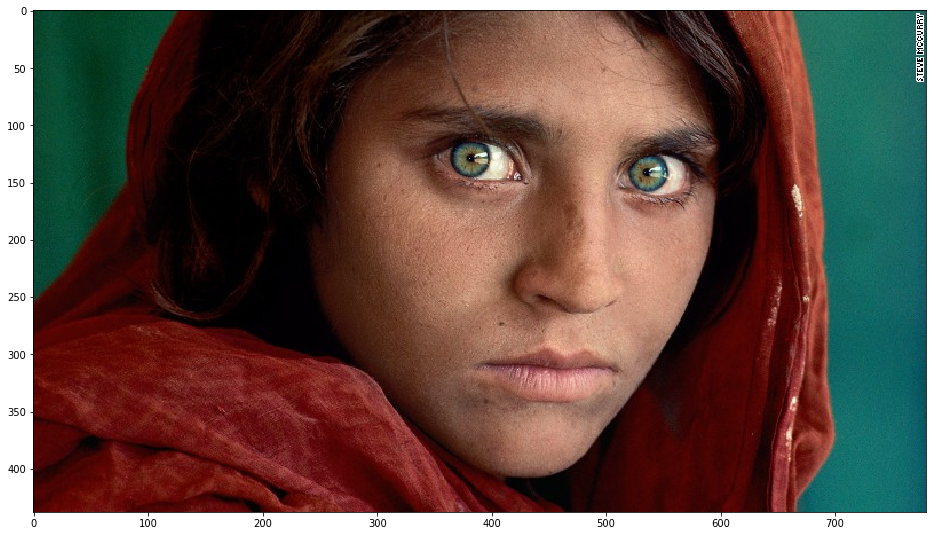

In [3]:
img = cv2.imread('images/girl.jpg')  # ucitavanje slike sa diska
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
plt.imshow(img)  # prikazivanje slike

### Prikazivanje dimenzija slike

In [4]:
print(img.shape)  # shape je property Numpy array-a za prikaz dimenzija

(438, 780, 3)


Obratiti pažnju da slika u boji ima 3 komponente za svaki piksel na slici - R (red), G (green) i B (blue).
![images/cat_rgb.png](images/cat_rgb.png)

In [5]:
img

array([[[  8,  68,  40],
        [  9,  69,  41],
        [  7,  70,  41],
        ...,
        [ 28,  92,  91],
        [ 30, 100, 100],
        [ 28, 100,  99]],

       [[ 12,  71,  43],
        [ 10,  70,  42],
        [  9,  69,  41],
        ...,
        [ 40, 100, 100],
        [ 23,  91,  90],
        [ 26,  96,  94]],

       [[  4,  60,  33],
        [  9,  68,  40],
        [ 15,  74,  46],
        ...,
        [ 34,  89,  86],
        [ 31,  93,  90],
        [ 31, 100,  97]],

       ...,

       [[ 74,   6,   5],
        [ 73,   5,   4],
        [ 75,   4,   2],
        ...,
        [ 10,  94, 104],
        [  6,  93, 102],
        [  5,  92, 101]],

       [[ 76,   5,   3],
        [ 76,   5,   3],
        [ 79,   3,   3],
        ...,
        [ 11,  95, 106],
        [  7,  94, 104],
        [  4,  91, 101]],

       [[ 78,   4,   3],
        [ 78,   4,   3],
        [ 81,   3,   3],
        ...,
        [  7,  91, 102],
        [  4,  91, 101],
        [  2,  89,  99]]

Primetite da je svaki element matrice **uint8** (unsigned 8-bit integer), odnosno celobroja vrednost u interval [0, 255].

In [6]:
img.dtype

dtype('uint8')

### Osnovne operacije pomoću Numpy

Predstavljanje slike kao Numpy array je vrlo korisna stvar, jer omogućava jednostavnu manipulaciju i izvršavanje osnovih operacija nad slikom.

#### Isecanje (crop)

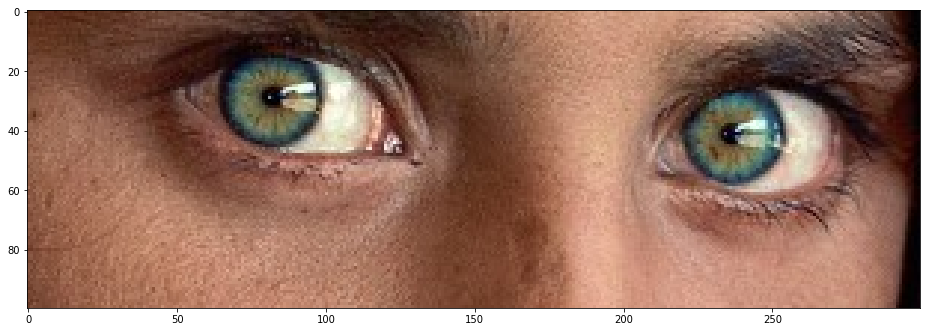

In [7]:
img_crop = img[100:200, 300:600]  # prva koordinata je po visini (formalno red), druga po širini (formalo kolona)
plt.imshow(img_crop)

#### Okretanje (flip)

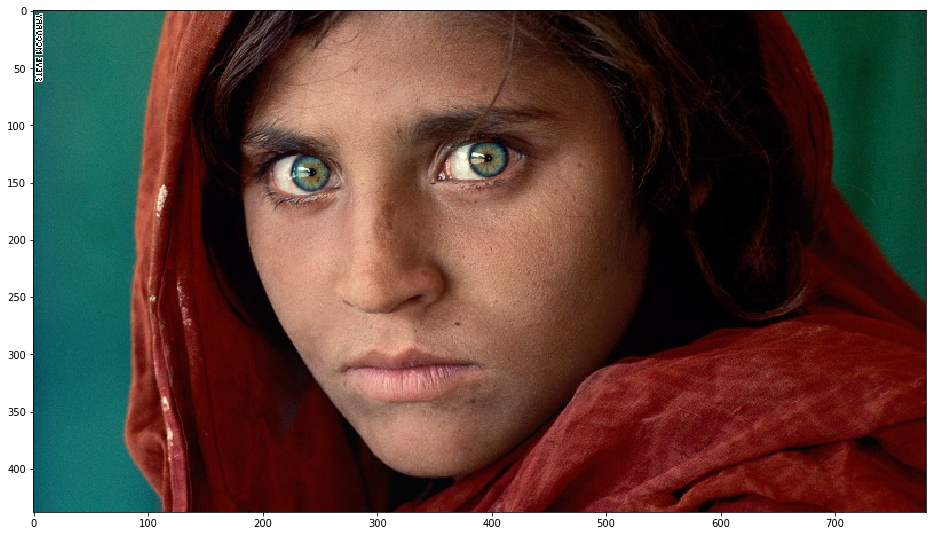

In [8]:
img_flip_h = img[:, ::-1]  # prva koordinata ostaje ista, a kolone se uzimaju unazad
plt.imshow(img_flip_h)

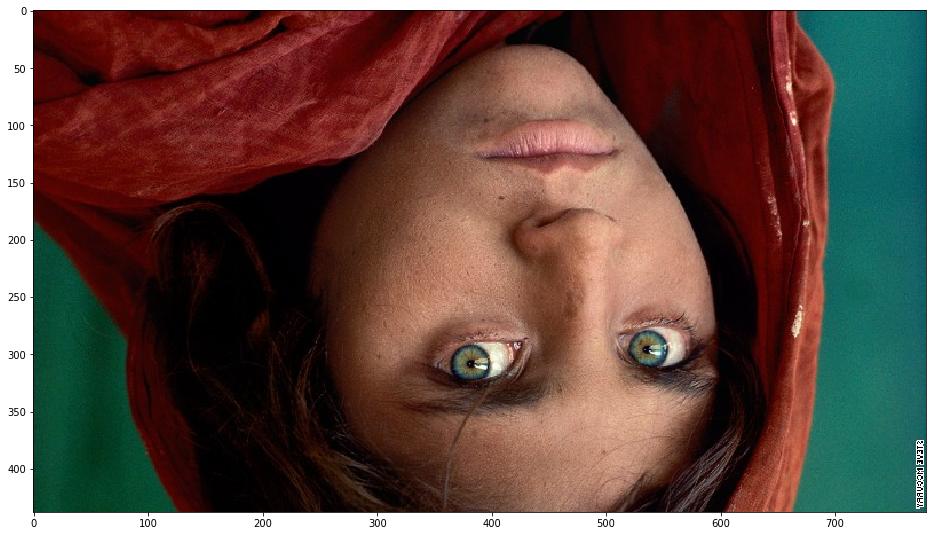

In [9]:
img_flip_v = img[::-1, :]  # druga koordinata ostaje ista, a redovi se uzimaju unazad
plt.imshow(img_flip_v)

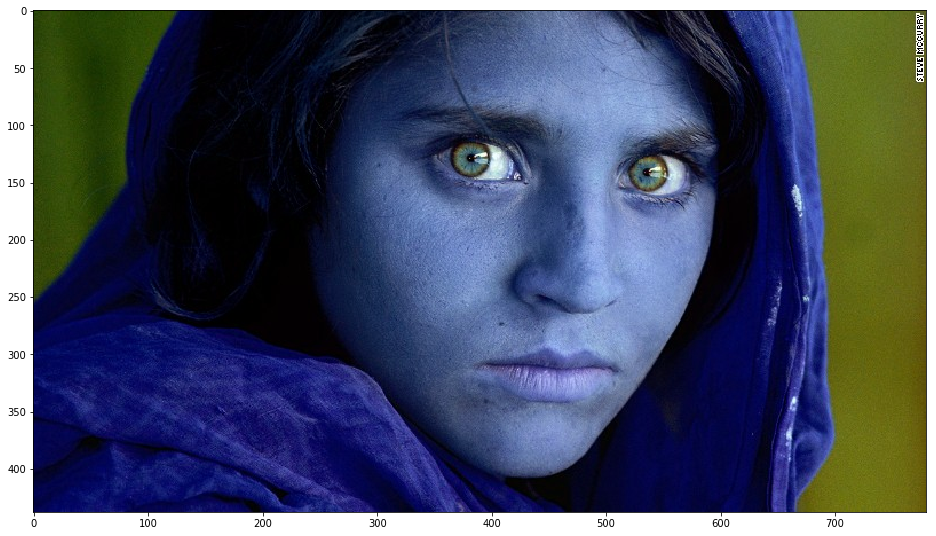

In [10]:
img_flip_c = img[:, :, ::-1]  # možemo i izmeniti redosled boja (RGB->BGR), samo je pitanje koliko to ima smisla
plt.imshow(img_flip_c)

#### Invertovanje

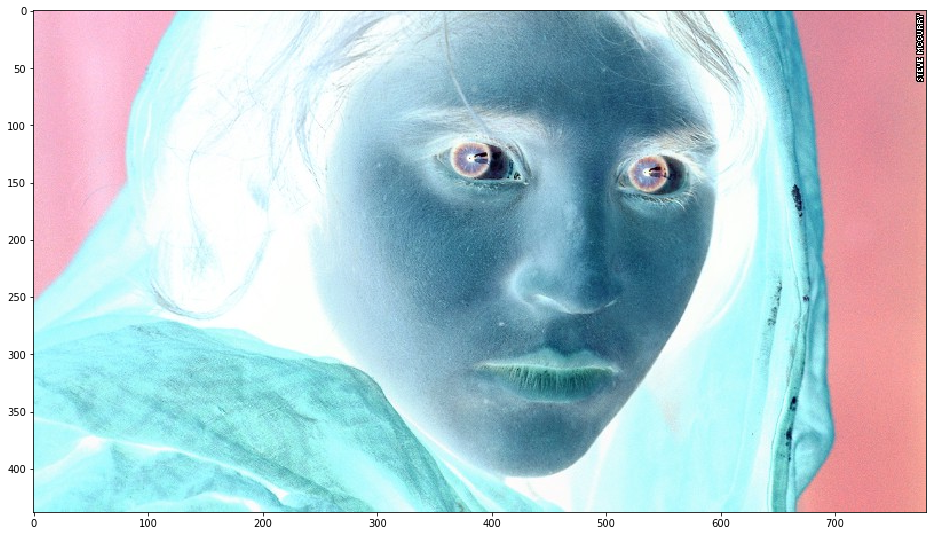

In [11]:
img_inv = 255 - img  # ako su pikeli u intervalu [0,255] ovo je ok, a ako su u intervalu [0.,1.] onda bi bilo 1. - img
plt.imshow(img_inv)

### Konvertovanje iz RGB u "grayscale"

Konvertovanjem iz RGB modela u nijanse sivih (grayscale) se gubi informacija o boji piksela na slici, ali sama slika postaje mnogo lakša za dalju obradu.

Ovo se može uraditi na više načina:
1. **Srednja vrednost** RGB komponenti - najjednostavnija varijanta $$ G = \frac{R+G+B}{3} $$
2. **Metod osvetljenosti** - srednja vrednost najjače i najslabije boje $$ G = \frac{max(R,G,B) + min(R,G,B)}{2} $$
3. **Metod perceptivne osvetljenosti** - težinska srednja vrednost koja uzima u obzir ljudsku percepciju (npr. najviše smo osetljivi na zelenu boju, pa to treba uzeti u obzir)$$ G = 0.21*R + 0.72*G + 0.07*B $$

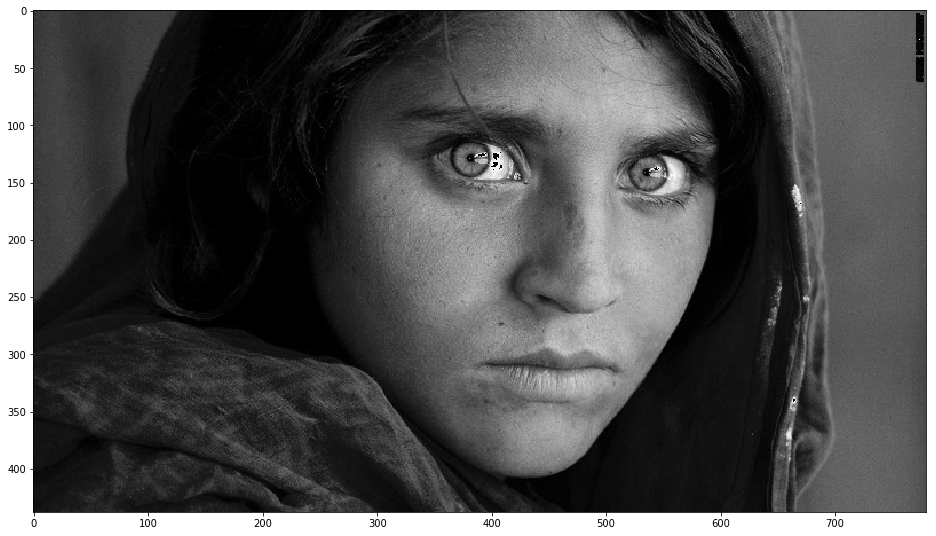

In [12]:
# implementacija metode perceptivne osvetljenosti
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray') # kada se prikazuje slika koja nije RGB, obavezno je staviti 'gray' kao drugi parametar

Ipak je najbolje se držati implementacije u **OpenCV** biblioteci :).

In [13]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [14]:
img_gray.shape

(438, 780)

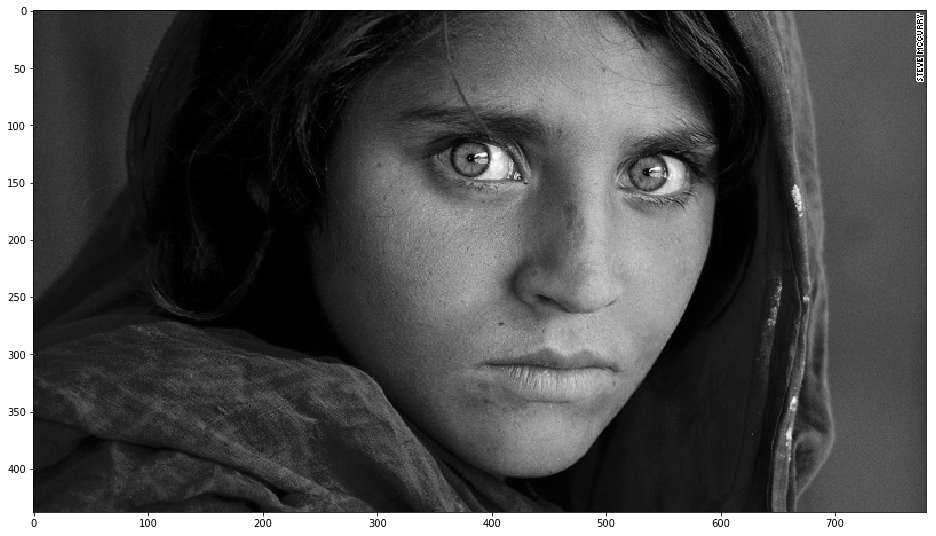

In [15]:
plt.imshow(img_gray, 'gray')  

In [16]:
img_gray

array([[47, 48, 48, ..., 73, 79, 78],
       [50, 49, 48, ..., 82, 71, 75],
       [40, 47, 53, ..., 72, 74, 79],
       ...,
       [26, 25, 25, ..., 70, 68, 67],
       [26, 26, 26, ..., 71, 69, 66],
       [26, 26, 26, ..., 67, 66, 64]], dtype=uint8)

### Binarna slika

Slika čiji pikseli imaju samo dve moguće vrednosti: crno i belo. U zavisnosti da li interval realan (float32) ili celobrojan (uint8), ove vrednosti mogu biti {0,1} ili {0,255}.

U binarnoj slici često izdvajamo ono što nam je bitno (**foreground**), od ono što nam je nebitno (**background**). Formalnije, ovaj postupak izdvajanja bitnog od nebitnog na slici nazivamo **segmentacija**.

Najčešći način dobijanja binarne slike je korišćenje nekog praga (**threshold**), pa ako je vrednost piksela veća od zadatog praga taj piksel dobija vrednost 1, u suprotnom 0. Postoji više tipova threshold-ovanja:

1. Globalni threshold - isti prag se primenjuje na sve piksele
2. Lokalni threshold - različiti pragovi za različite delove slike
3. Adaptivni threshold - prag se ne određuje ručno (ne zadaje ga čovek), već kroz neki postupak. Može biti i globalni i lokalni.

#### Globalni threshold

Kako izdvojiti npr. samo lice?

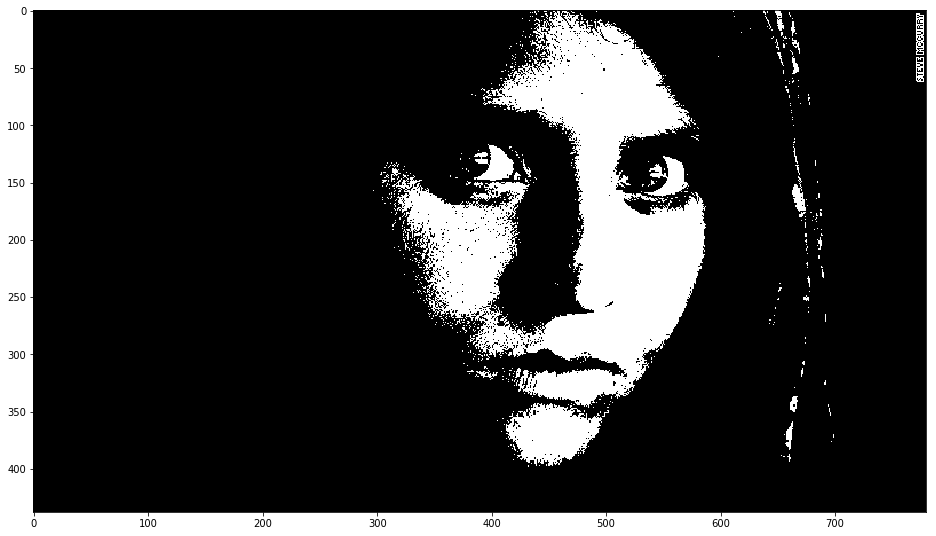

In [17]:
img_tr = img_gray > 127  # svi piskeli koji su veci od 127 ce dobiti vrednost True, tj. 1, i obrnuto
plt.imshow(img_tr, 'gray')

OpenCV ima metodu <b>threshold</b> koja kao prvi parametar prima sliku koja se binarizuje, kao drugi parametar prima prag binarizacije, treći parametar je vrednost rezultujućeg piksela ako je veći od praga (255=belo), poslednji parametar je tip thresholda (u ovo slučaju je binarizacija).

100.0


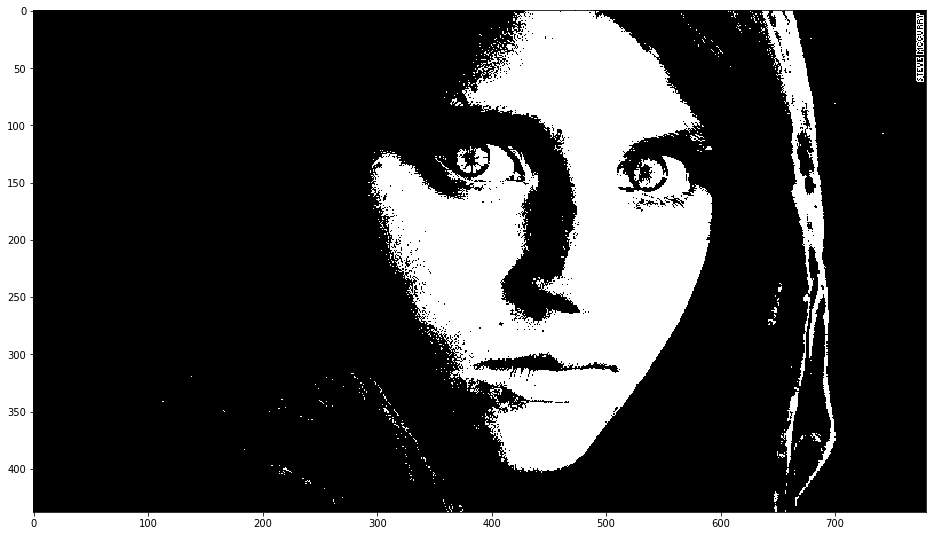

In [18]:
ret, image_bin = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY) # ret je vrednost praga, image_bin je binarna slika
print(ret)
plt.imshow(image_bin, 'gray')

#### Otsu threshold

<a href="https://en.wikipedia.org/wiki/Otsu%27s_method">Otsu metoda</a> se koristi za automatsko pronalaženje praga za threshold na slici.

Otsu's threshold: 70.0


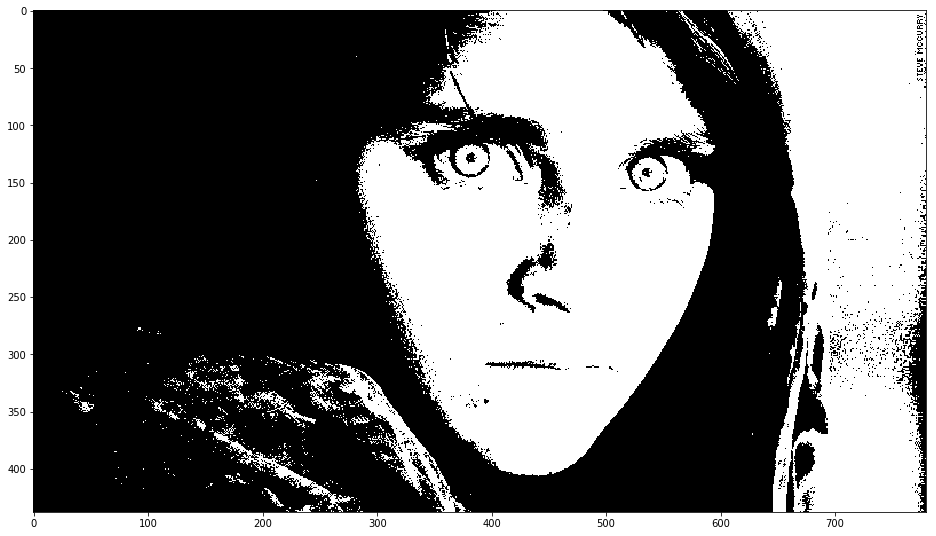

In [19]:
ret, image_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU) # ret je izracunata vrednost praga, image_bin je binarna slika
print("Otsu's threshold: " + str(ret))
plt.imshow(image_bin, 'gray')

#### Adaptivni threshold

U nekim slučajevima primena globalnog praga za threshold ne daje dobre rezultate. Dobar primer su slike na kojima se menja osvetljenje, gde globalni threshold praktično uništi deo slike koji je previše osvetljen ili zatamnjen.

Adaptivni threshold je drugačiji pristup, gde se za svaki piksel na slici izračunava zaseban prag, na osnovu njemu okolnnih piksela. <a href="https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0">Primer</a>

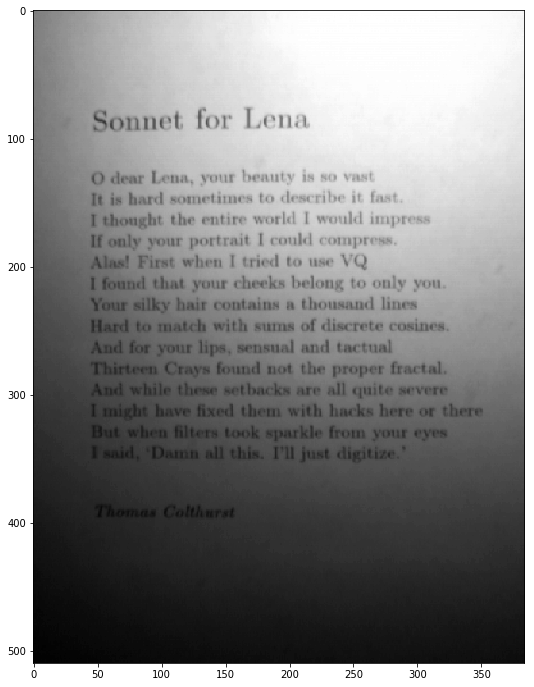

In [20]:
image_ada = cv2.imread('images/sonnet.png')
image_ada = cv2.cvtColor(image_ada, cv2.COLOR_BGR2GRAY)
plt.imshow(image_ada, 'gray')

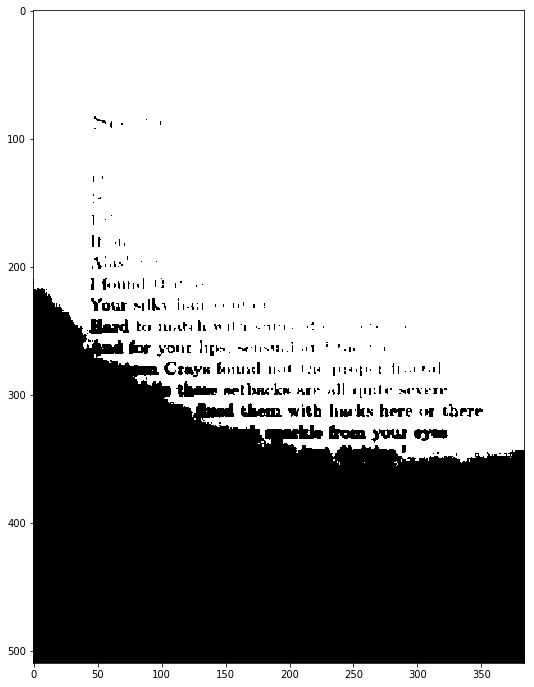

In [21]:
ret, image_ada_bin = cv2.threshold(image_ada, 100, 255, cv2.THRESH_BINARY)
plt.imshow(image_ada_bin, 'gray')

Loši rezultati su dobijeni upotrebom globalnog thresholda.
Poboljšavamo rezultate korišćenjem adaptivnog thresholda. Pretposlednji parametar metode <b>adaptiveThreshold</b> je ključan, jer predstavlja veličinu bloka susednih piksela (npr. 15x15) na osnovnu kojih se računa lokalni prag.

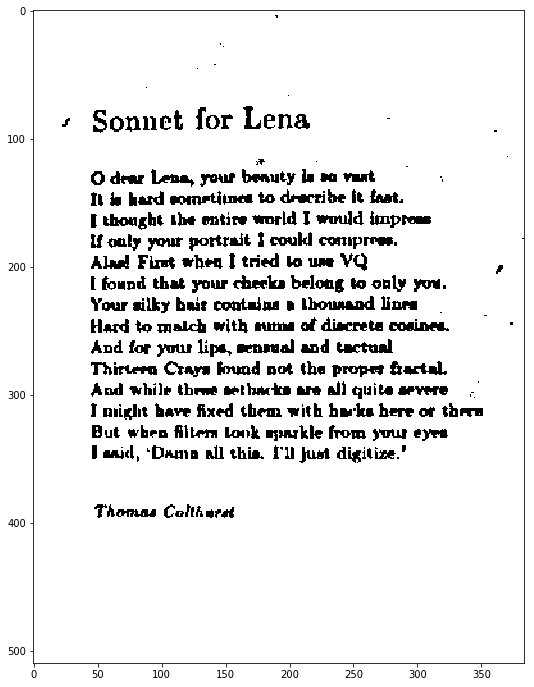

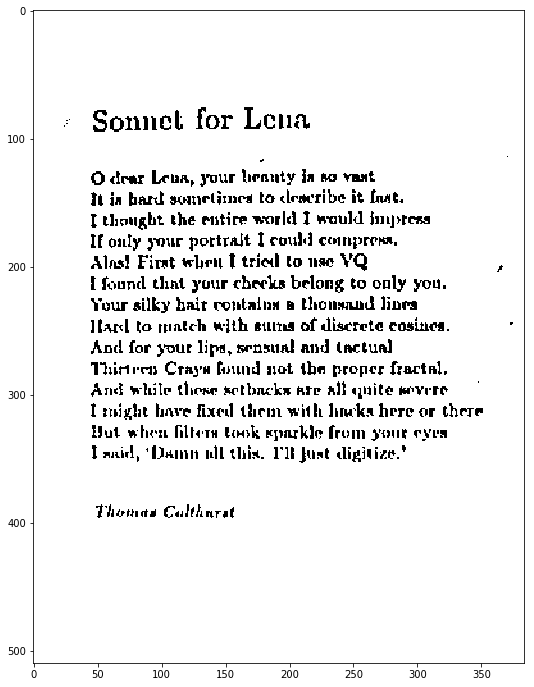

In [22]:
# adaptivni threshold gde se prag racuna = srednja vrednost okolnih piksela
image_ada_bin = cv2.adaptiveThreshold(image_ada, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure() # ako je potrebno da se prikaze vise slika u jednoj celiji
plt.imshow(image_ada_bin, 'gray')

# adaptivni threshold gde se prag racuna = tezinska suma okolnih piksela, gde su tezine iz gausove raspodele
image_ada_bin = cv2.adaptiveThreshold(image_ada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure()
plt.imshow(image_ada_bin, 'gray')

### Histogram

Možemo koristiti **histogram**, koji će nam dati informaciju o distribuciji osvetljenosti piksela.

Vrlo koristan kada je potrebno odrediti prag za globalni threshold.

Pseudo-kod histograma za grayscale sliku:  
```code
inicijalizovati nula vektor od 256 elemenata  

za svaki piksel na slici:
    preuzeti inicijalni intezitet piksela
    uvecati za 1 broj piksela tog inteziteta

plotovati histogram
```

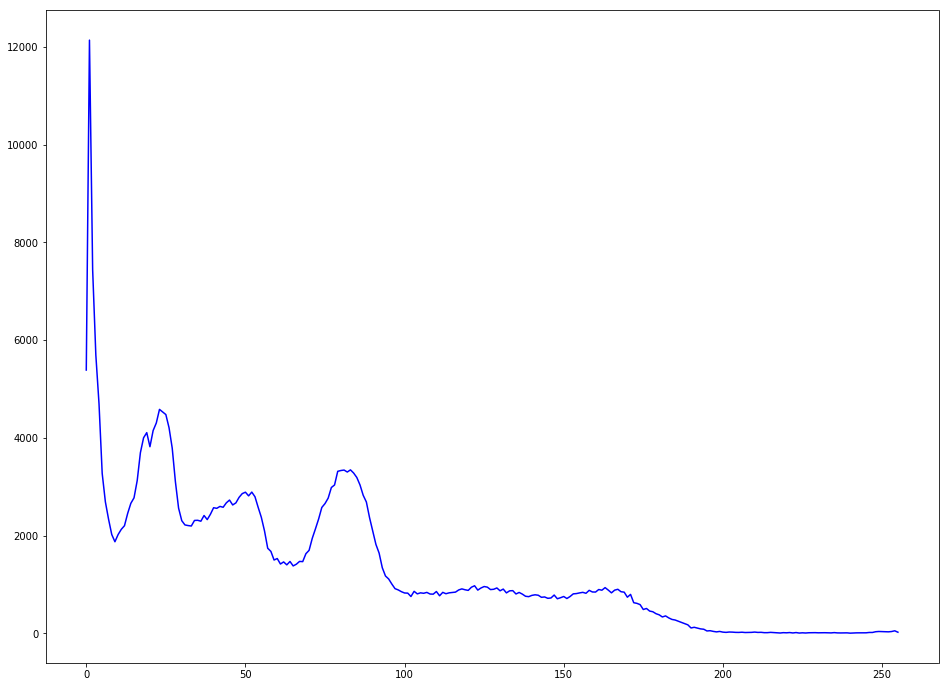

In [23]:
def hist(image):
    height, width = image.shape[0:2]
    x = range(0, 256)
    y = np.zeros(256)
    
    for i in range(0, height):
        for j in range(0, width):
            pixel = image[i, j]
            y[pixel] += 1
    
    return (x, y)

x,y = hist(img_gray)
plt.plot(x, y, 'b')
plt.show()

Koristeći <b>matplotlib</b>:

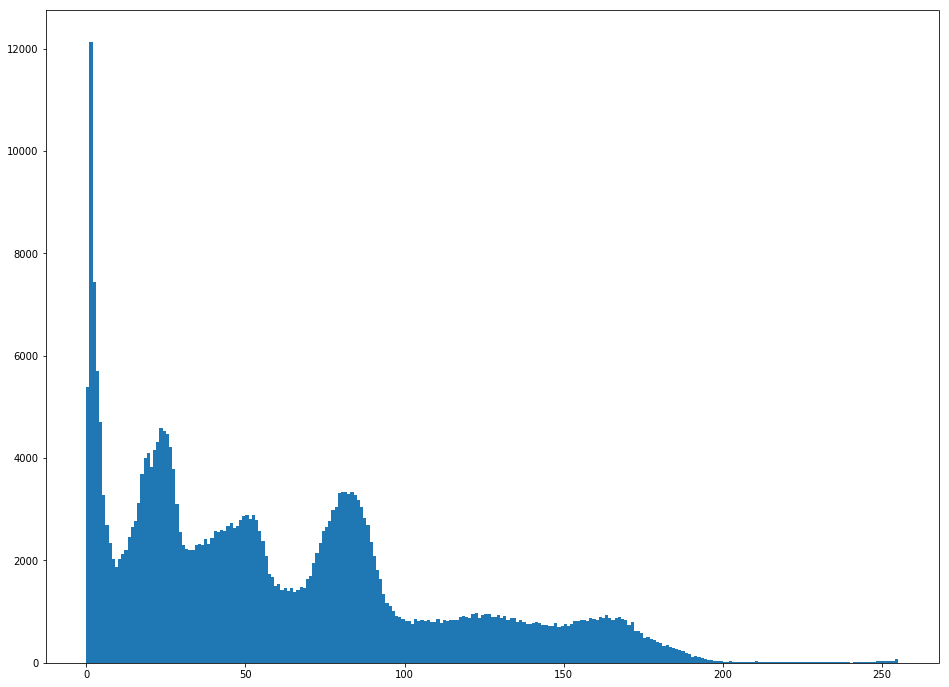

In [24]:
plt.hist(img_gray.ravel(), 255, [0, 255])
plt.show()

Koristeći <b>OpenCV</b>:

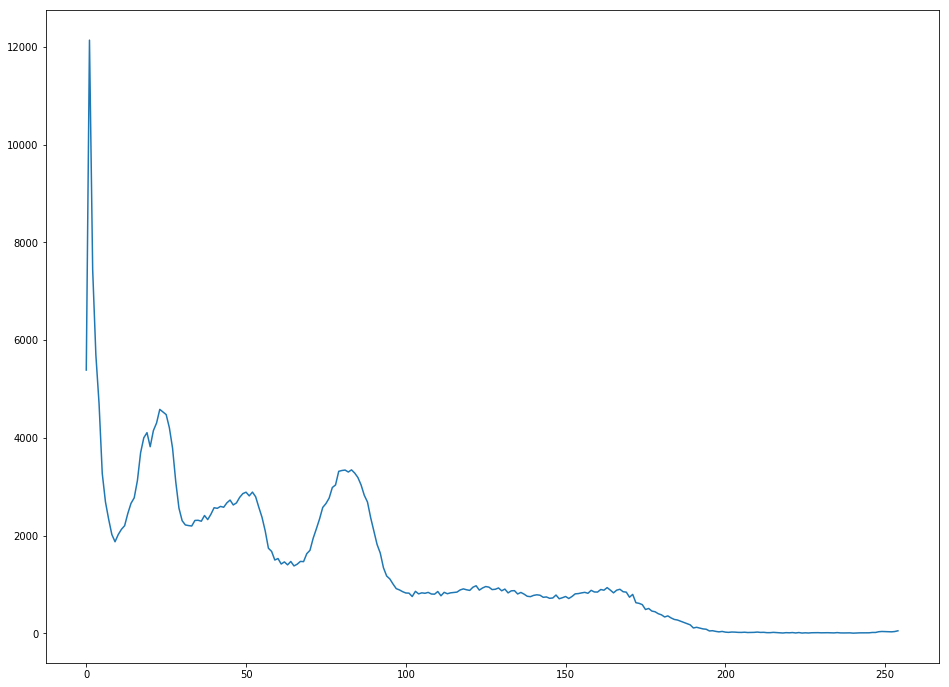

In [25]:
hist_full = cv2.calcHist([img_gray], [0], None, [255], [0, 255])
plt.plot(hist_full)
plt.show()

Pretpostavimo da su vrednosti piksela lica između 100 i 200.

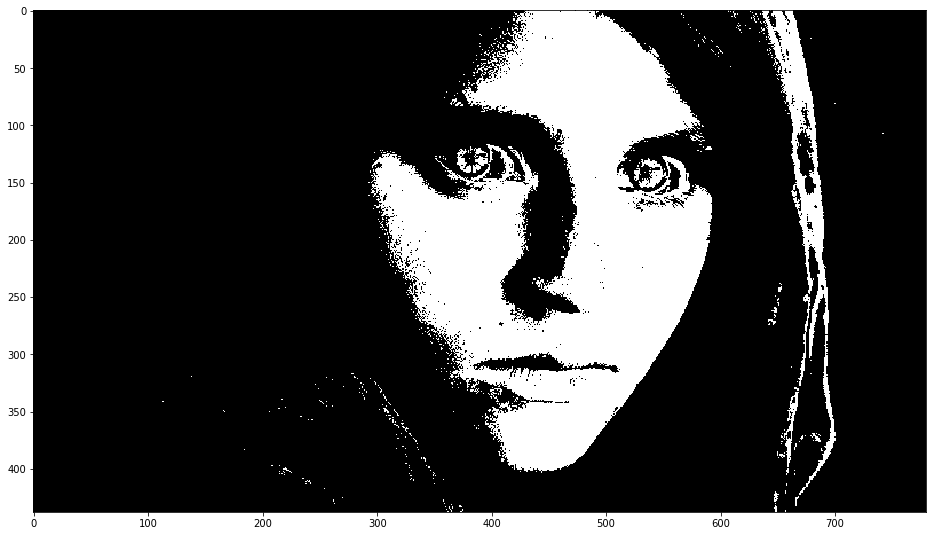

In [26]:
img_tr = (img_gray > 100) * (img_gray < 200)
plt.imshow(img_tr, 'gray')

### Konverovanje iz "grayscale" u RGB

Ovo je zapravo trivijalna operacija koja za svaki kanal boje (RGB) napravi kopiju od originalne grayscale slike. Ovo je zgodno kada nešto što je urađeno u grayscale modelu treba iskoristiti zajedno sa RGB slikom.

In [27]:
img_tr_rgb = cv2.cvtColor(img_tr.astype('uint8'), cv2.COLOR_GRAY2RGB)

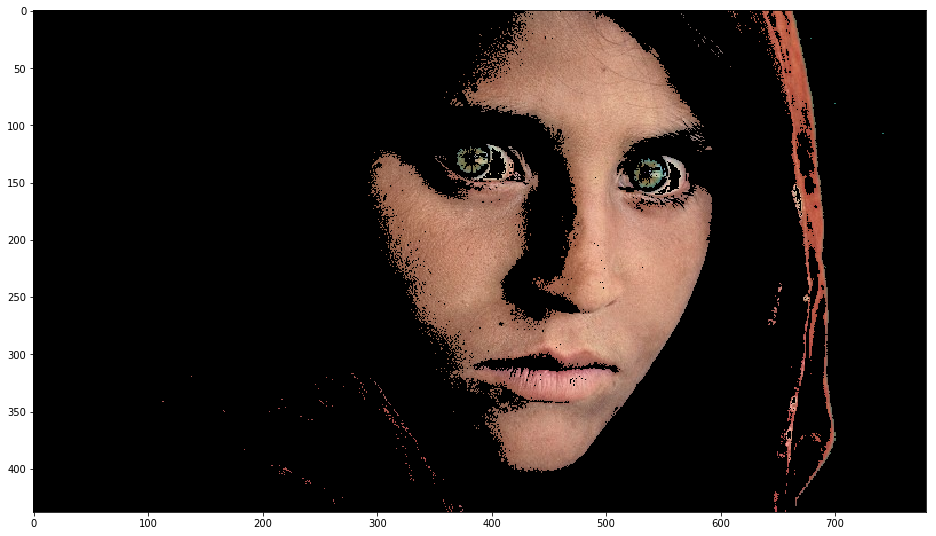

In [28]:
plt.imshow(img*img_tr_rgb)  # množenje originalne RGB slike i slike sa izdvojenim pikselima lica

### Morfološke operacije

Veliki skup operacija za obradu digitalne slike, gde su te operacije zasnovane na oblicima, odnosno **strukturnim elementima**. U morfološkim operacijama, vrednost svakog piksela rezultujuće slike se zasniva na poređenju odgovarajućeg piksela na originalnoj slici sa svojom okolinom. Veličina i oblik ove okoline predstavljaju strukturni element.

In [29]:
kernel = np.ones((3, 3)) # strukturni element 3x3 blok
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


#### Erozija

Morfološka erozija postavlja vrednost piksela rez. slike na ```(i,j)``` koordinatama na **minimalnu** vrednost svih piksela u okolini ```(i,j)``` piksela na orig. slici.

U suštini erozija umanjuje regione belih piksela, a uvećava regione crnih piksela. Često se koristi za uklanjanje šuma (u vidu sitnih regiona belih piksela).

![images/erosion.gif](images/erosion.gif)

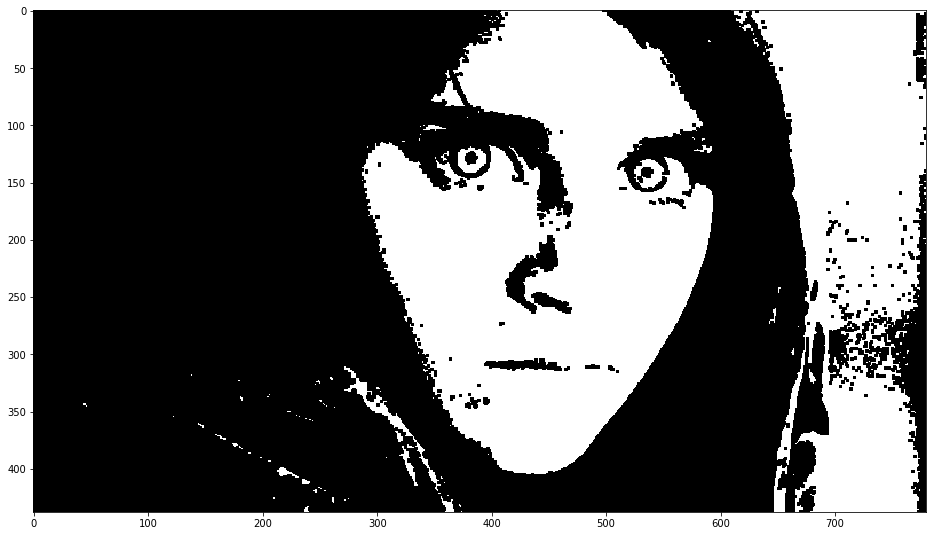

In [30]:
plt.imshow(cv2.erode(image_bin, kernel, iterations=1), 'gray')

#### Dilacija

Morfološka dilacija postavlja vrednost piksela rez. slike na ```(i,j)``` koordinatama na **maksimalnu** vrednost svih piksela u okolini ```(i,j)``` piksela na orig. slici.

U suštini dilacija uvećava regione belih piksela, a umanjuje regione crnih piksela. Zgodno za izražavanje regiona od interesa.

![images/dilation.gif](images/dilation.gif)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


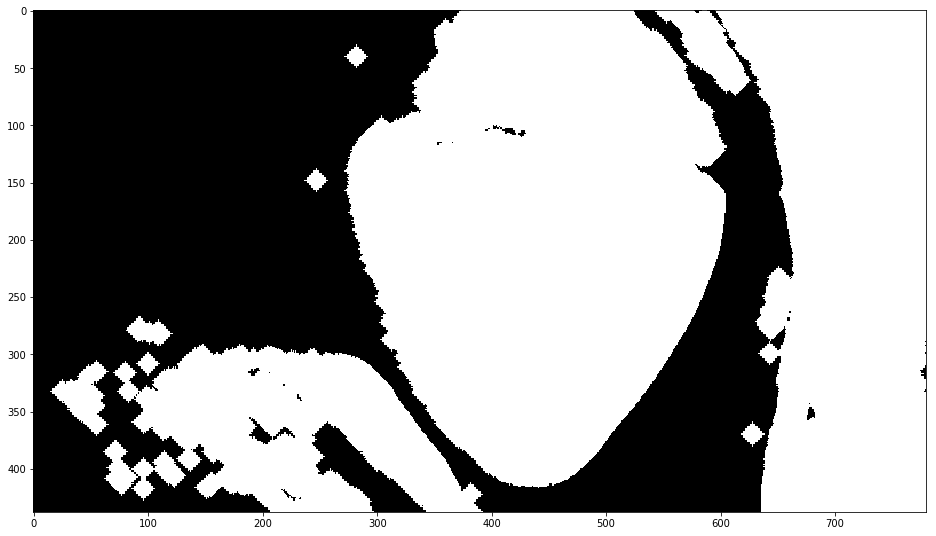

In [31]:
# drugaciji strukturni element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5)) # MORPH_ELIPSE, MORPH_RECT...
print(kernel)
plt.imshow(cv2.dilate(image_bin, kernel, iterations=5), 'gray') # 5 iteracija

#### Otvaranje i zatvaranje

**```otvaranje = erozija + dilacija```**, uklanjanje šuma erozijom i vraćanje originalnog oblika dilacijom.

**```zatvaranje = dilacija + erozija```**, zatvaranje sitnih otvora među belim pikselima

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


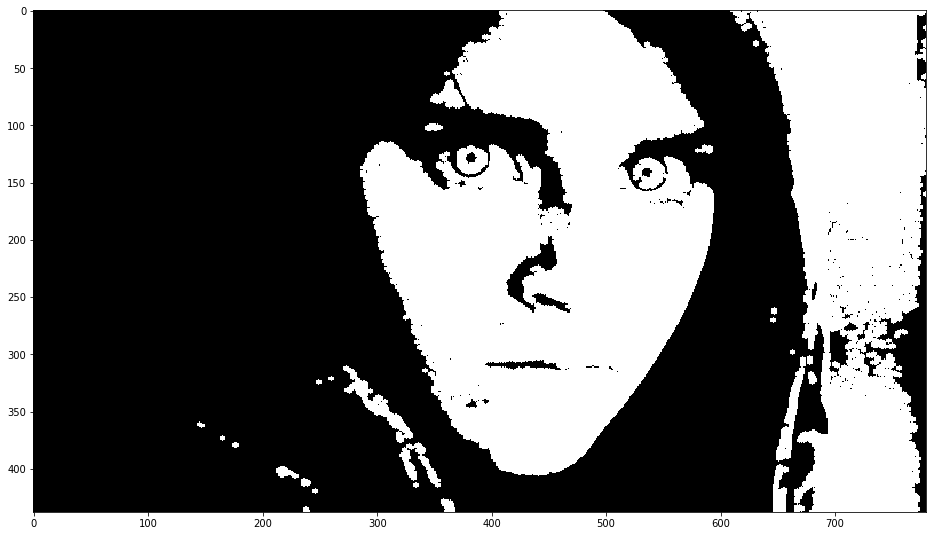

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
print(kernel)
img_ero = cv2.erode(image_bin, kernel, iterations=1)
img_open = cv2.dilate(img_ero, kernel, iterations=1)
plt.imshow(img_open, 'gray')

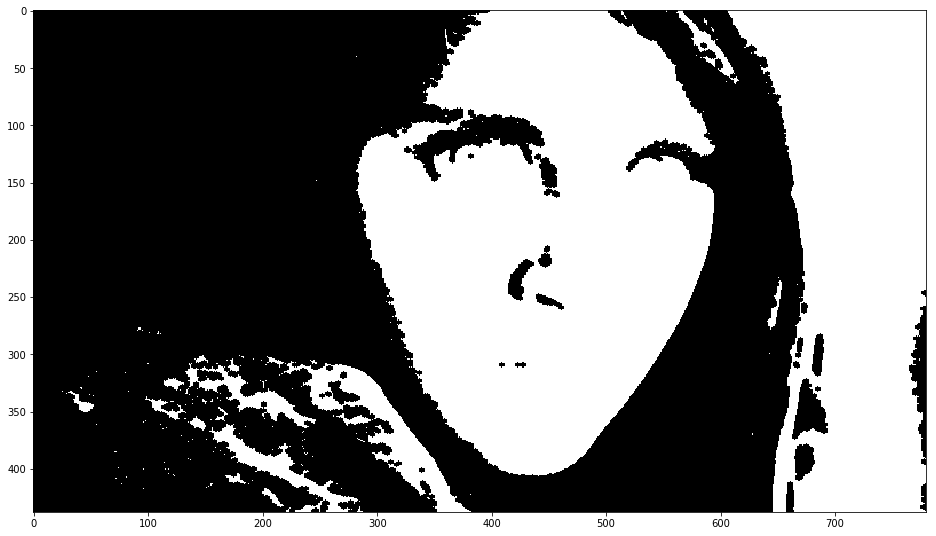

In [33]:
img_dil = cv2.dilate(image_bin, kernel, iterations=1)
img_close = cv2.erode(img_dil, kernel, iterations=1)
plt.imshow(img_close, 'gray')

Primer detekcije ivica na binarnoj slici korišćenjem dilatacije i erozije:

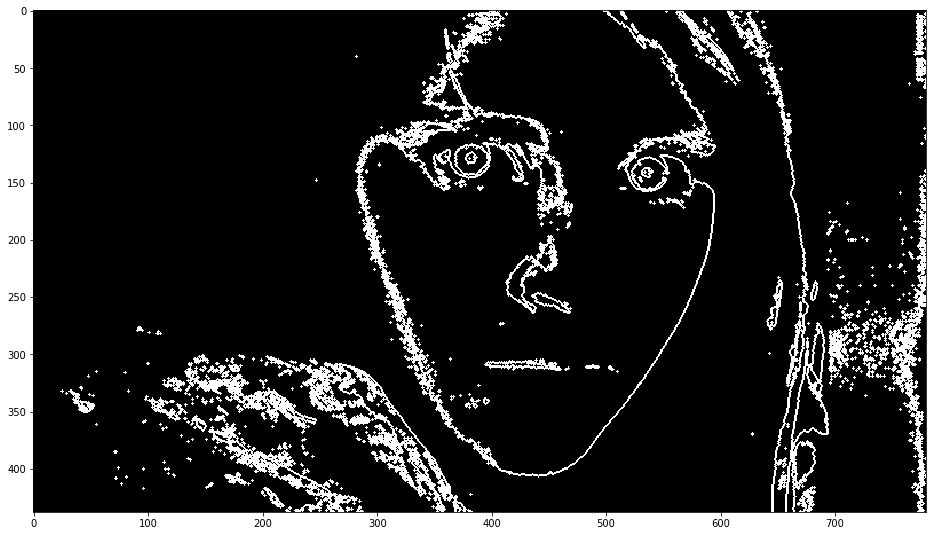

In [34]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
image_edges = cv2.dilate(image_bin, kernel, iterations=1) - cv2.erode(image_bin, kernel, iterations=1)
plt.imshow(image_edges, 'gray')

### Zamućenje (blur)

Zamućenje slike se dobija tako što se za svaki piksel slike kao nova vrednost uzima srednja vrednost okolnih piksela, recimo u okolini 5 x 5. Kernel <b>k</b> predstavlja kernel za <i>uniformno zamućenje</i>. Ovo je jednostavnija verzija <a href="https://en.wikipedia.org/wiki/Gaussian_blur">Gausovskog zamućenja</a>.

<img src="https://render.githubusercontent.com/render/math?math=k%285x5%29%3D%0A%20%20%5Cbegin%7Bbmatrix%7D%0A%20%20%20%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%5C%5C%0A%20%20%20%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%5C%5C%0A%20%20%20%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%5C%5C%0A%20%20%20%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%5C%5C%0A%20%20%20%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%20%26amp%3B%201%2F25%0A%20%20%5Cend%7Bbmatrix%7D&mode=display">

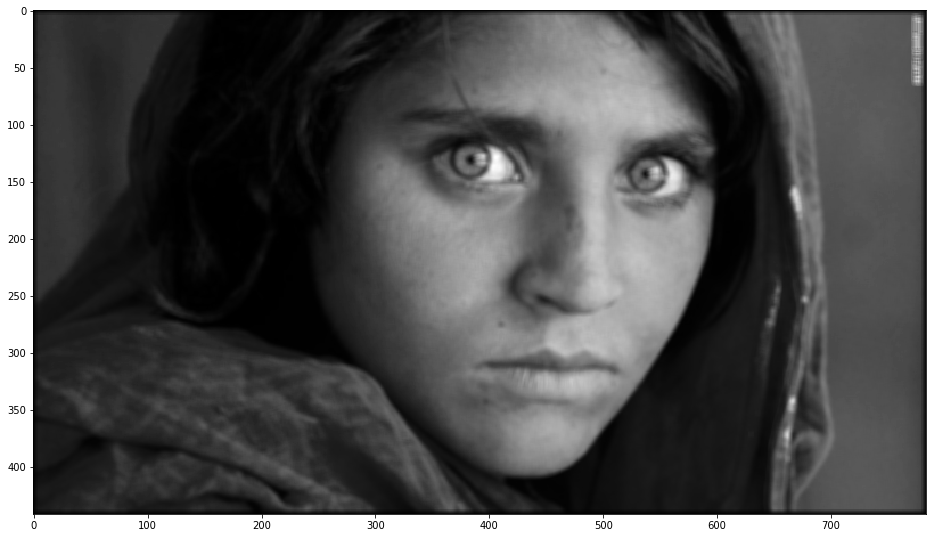

In [35]:
from scipy import signal

k_size = 5
k = (1./k_size*k_size) * np.ones((k_size, k_size))
image_blur = signal.convolve2d(img_gray, k)
plt.imshow(image_blur, 'gray')

### Regioni i izdvajanje regiona

Najjednostavnije rečeno, region je skup međusobno povezanih belih piksela. Kada se kaže povezanih, misli se na to da se nalaze u neposrednoj okolini. Razlikuju se dve vrste povezanosti: tzv. **4-connectivity** i **8-connectivity**:

![images/48connectivity.png](images/48connectivity.png)

Postupak kojim se izdvajanju/obeležavaju regioni se naziva **connected components labelling**. Ovo ćemo primeniti na problemu izdvajanja barkoda.

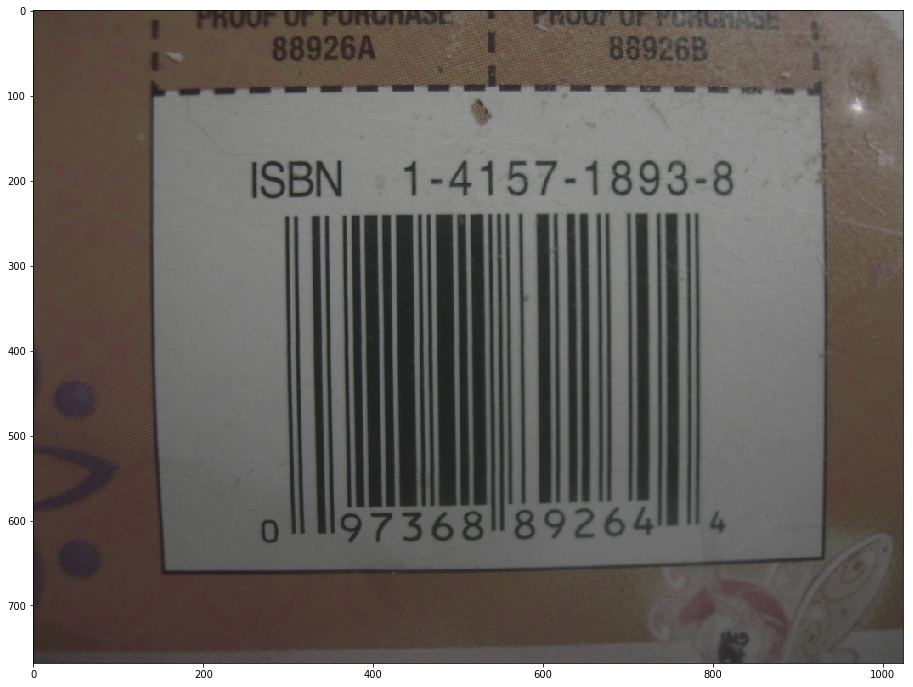

In [36]:
# ucitavanje slike i convert u RGB
img_barcode = cv2.cvtColor(cv2.imread('images/barcode.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img_barcode)

Recimo da želimo da izdvojimo samo linije barkoda sa slike.
Za početak, uradimo neke standardne operacije, kao što je konvertovanje u grayscale i adaptivni threshold.

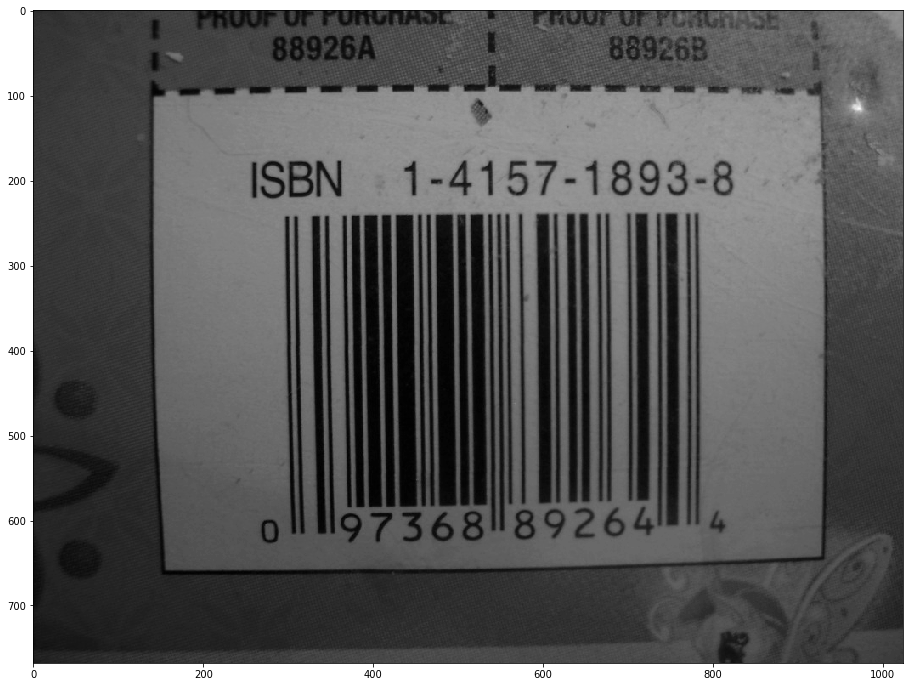

In [37]:
img_barcode_gs = cv2.cvtColor(img_barcode, cv2.COLOR_RGB2GRAY) # konvert u grayscale
plt.imshow(img_barcode_gs, 'gray')

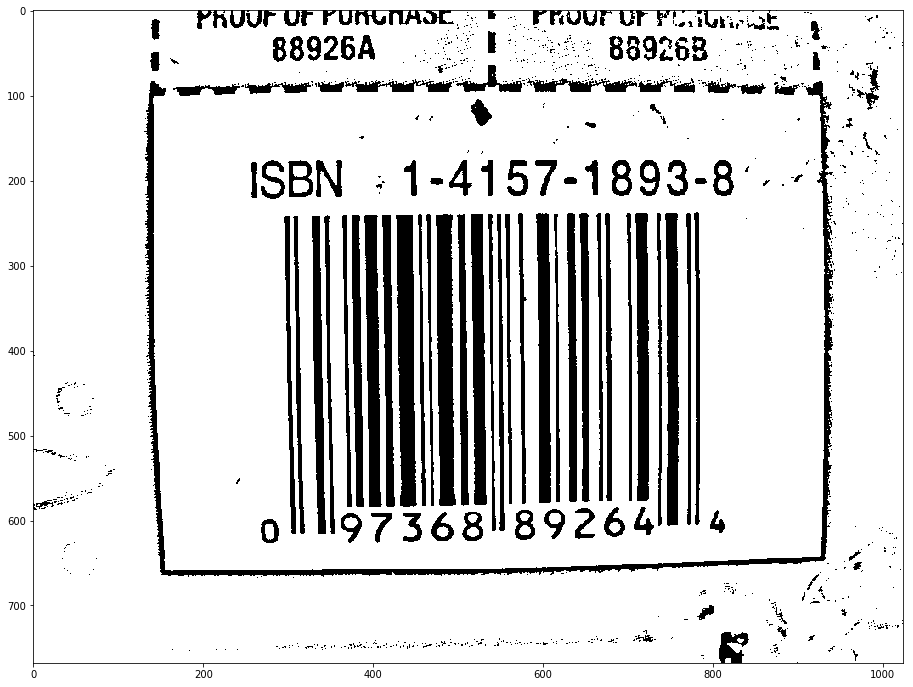

In [38]:
#ret, image_barcode_bin = cv2.threshold(img_barcode_gs, 80, 255, cv2.THRESH_BINARY)
image_barcode_bin = cv2.adaptiveThreshold(img_barcode_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
plt.imshow(image_barcode_bin, 'gray')

### Pronalaženje kontura/regiona

Konture, odnosno regioni na slici su grubo rečeno grupe crnih piksela. OpenCV metoda <b>findContours</b> pronalazi sve ove grupe crnih piksela, tj. regione. Druga povratna vrednost metode, odnosno <i>contours</i> je lista pronađeih kontura na slici.

Ove konture je zaim moguće iscrtati metodom <b>drawContours</b>, gde je prvi parametar slika na kojoj se iscrtavaju pronađene konture, drugi parametar je lista kontura koje je potrebno iscrtati, treći parametar određuje koju konturu po redosledu iscrtati (-1 znači iscrtavanje svih kontura), četvrti parametar je boja kojom će se obeležiti kontura, a poslednji parametar je debljina linije.

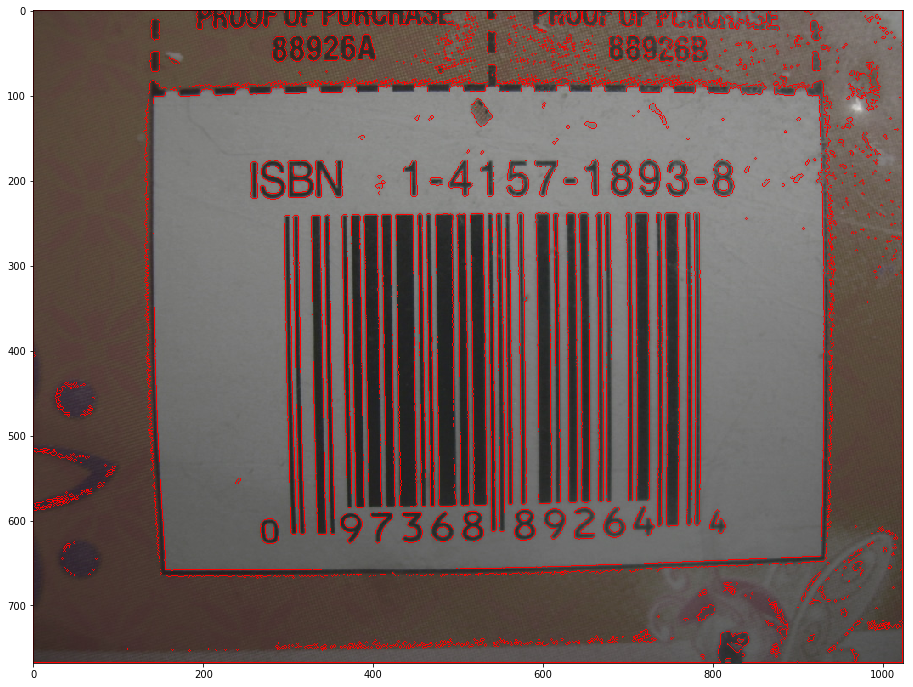

In [39]:
img, contours, hierarchy = cv2.findContours(image_barcode_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_barcode.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plt.imshow(img)

#### Osobine regiona

Svi pronađeni regioni imaju neke svoje karakteristične osobine: površina, obim, konveksni omotač, konveksnost, obuhvatajući pravougaonik, ugao... Ove osobine mogu biti izuzetno korisne kada je neophodno izdvojiti samo određene regione sa slike koji ispoljavaju neku osobinu. Za sve osobine pogledati <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html">ovo</a> i <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html">ovo</a>.

Izdvajamo samo bar-kod sa slike.

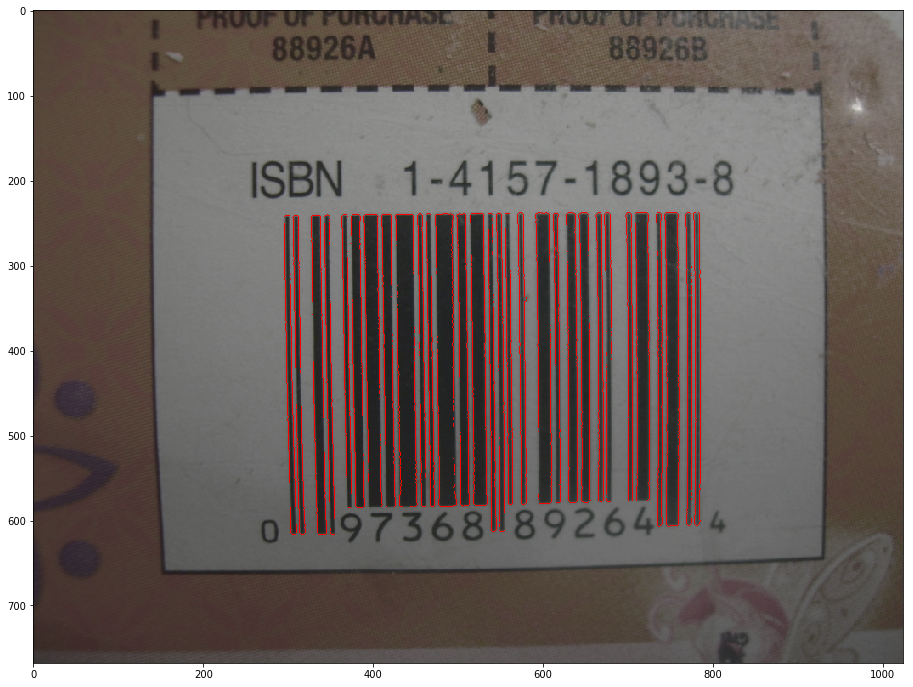

In [40]:
contours_barcode = [] #ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
    width, height = size
    if width > 3 and width < 30 and height > 300 and height < 400: # uslov da kontura pripada bar-kodu
        contours_barcode.append(contour) # ova kontura pripada bar-kodu

img = img_barcode.copy()
cv2.drawContours(img, contours_barcode, -1, (255, 0, 0), 1)
plt.imshow(img)

In [41]:
print('Ukupan broj regiona: %d' % len(contours_barcode))

Ukupan broj regiona: 30


Naravno, u ogromnom broj slučajeva odnos visine i širine neće biti dovoljan, već se moraju koristiti i ostale osobine.

## Zadaci

* Sa slike sa sijalicama (**images/bulbs.jpg**) prebrojati koliko ima sijalica.
* Sa slike barkoda (**images/barcode.jpg**) izdvojiti samo brojeve i slova, bez linija barkoda.
* Na slici sa snouborderima (**images/snowboarders.jpg**) prebrojati koliko ima snoubordera.
* Na slici sa fudbalerima (**images/football.jpg**) izdvojiti samo one fudbalere u belim dresovima.


* Za konture koje imaju malo dodirnih tačaka istražiti **Watershed** algoritam i primeniti ga (https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html)